# Data management

## Machine Learning - Regressions

## [Michel Coppée](https://www.uliege.be/cms/c_9054334/fr/repertoire?uid=u224042) & [Malka Guillot](https://malkaguillot.github.io/)

## HEC Liège | [ECON2306]()

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/malkaguillot/ECON2206-Data-Management-2023/HEAD?labpath=%2Fpractice%2F4.2-ML-regressions.ipynb)


Regression belongs like classification to the field of **supervised learning**. 


<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
<strong>Regression predicts numerical values</strong> 
in contrast to classification which predicts categories.
</div>

<div class="alert alert-block alert-warning">
<i class="fa fa-info-circle"></i>&nbsp; 
    Other differences are:
<ul>
    <li> Accuracy in measured differently </li>
    <li> Other algorithms </li>
   </ul>

</div>

In [1]:
# Common imports
import numpy as np
import os
import pandas as pd

# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

# to make this notebook's output identical at every run
np.random.seed(42)

In [2]:
import sklearn

## Set up and load data

## Airbnb London (Hackney) data

- 94 variables, including many binaries for location and amenities
- Key variables: size, type, location, amenities
- Quantitative target: price (in USD)

*Objective*: **predict the value of prices** of the rental price using the given features

In [3]:
data = pd.read_csv("airbnb_hackney_work.csv")
data.head()

,f_property_type,f_room_type,f_room_type2,f_cancellation_policy,f_bed_type,f_neighbourhood_cleansed,usd_price_day,n_accommodates,n_bathrooms,n_review_scores_rating,...,ln_days_since,ln_days_since2,ln_days_since3,n_days_since2,n_days_since3,ln_review_scores_rating,f_minimum_nights,flag_days_since,flag_review_scores_rating,flag_reviews_per_month
0,Apartment,Private room,Private,flexible,Real Bed,Hackney,65.0,2.0,1.5,92.0,...,7.291656,53.168250,387.684602,2152089.0,3.157115e+09,4.521789,1.0,0,0,0
1,House,Private room,Private,moderate,Real Bed,Hackney,30.0,2.0,3.0,90.0,...,6.352629,40.355900,256.366078,328329.0,1.881325e+08,4.499810,1.0,0,0,0
2,Apartment,Private room,Private,moderate,Couch,Hackney,150.0,7.0,1.5,97.0,...,7.461640,55.676077,415.434868,3024121.0,5.258946e+09,4.574711,2.0,0,0,0
3,House,Private room,Private,moderate,Real Bed,Hackney,29.0,2.0,1.5,94.0,...,6.386879,40.792227,260.535034,351649.0,2.085279e+08,4.543295,1.0,0,0,0
4,Apartment,Entire home/apt,Entire/Apt,moderate,Real Bed,Hackney,65.0,2.0,1.0,88.0,...,7.288928,53.128467,387.249554,2140369.0,3.131360e+09,4.477337,2.0,0,0,0


Data Set Characteristics:

In [4]:
print(data.columns)

Index(['f_property_type', 'f_room_type', 'f_room_type2',
       'f_cancellation_policy', 'f_bed_type', 'f_neighbourhood_cleansed',
       'usd_price_day', 'n_accommodates', 'n_bathrooms',
       'n_review_scores_rating', 'n_number_of_reviews', 'n_guests_included',
       'n_reviews_per_month', 'n_extra_people', 'n_minimum_nights', 'n_beds',
       'n_days_since', 'd_24hourcheckin', 'd_airconditioning', 'd_breakfast',
       'd_buzzerwirelessintercom', 'd_cabletv', 'd_carbonmonoxidedetector',
       'd_cats', 'd_dogs', 'd_doorman', 'd_doormanentry', 'd_dryer',
       'd_elevatorinbuilding', 'd_essentials', 'd_familykidfriendly',
       'd_fireextinguisher', 'd_firstaidkit', 'd_freeparkingonpremises',
       'd_freeparkingonstreet', 'd_gym', 'd_hairdryer', 'd_hangers',
       'd_heating', 'd_hottub', 'd_indoorfireplace', 'd_internet', 'd_iron',
       'd_keypad', 'd_kitchen', 'd_laptopfriendlyworkspace',
       'd_lockonbedroomdoor', 'd_lockbox', 'd_otherpets',
       'd_paidparkingoffpr

### Create $X$ and $y$

In [5]:
features= data.drop(columns=['usd_price_day', 'price','ln_price', 'id'])
y_full= data['ln_price']

n_samples = features.shape[0]
n_features = features.shape[1]
print(n_samples, n_features)

4393 87


In [6]:
features_df=pd.DataFrame(features) # to dataframe format
features_df.head()

,f_property_type,f_room_type,f_room_type2,f_cancellation_policy,f_bed_type,f_neighbourhood_cleansed,n_accommodates,n_bathrooms,n_review_scores_rating,n_number_of_reviews,...,ln_days_since,ln_days_since2,ln_days_since3,n_days_since2,n_days_since3,ln_review_scores_rating,f_minimum_nights,flag_days_since,flag_review_scores_rating,flag_reviews_per_month
0,Apartment,Private room,Private,flexible,Real Bed,Hackney,2.0,1.5,92.0,3.0,...,7.291656,53.168250,387.684602,2152089.0,3.157115e+09,4.521789,1.0,0,0,0
1,House,Private room,Private,moderate,Real Bed,Hackney,2.0,3.0,90.0,2.0,...,6.352629,40.355900,256.366078,328329.0,1.881325e+08,4.499810,1.0,0,0,0
2,Apartment,Private room,Private,moderate,Couch,Hackney,7.0,1.5,97.0,32.0,...,7.461640,55.676077,415.434868,3024121.0,5.258946e+09,4.574711,2.0,0,0,0
3,House,Private room,Private,moderate,Real Bed,Hackney,2.0,1.5,94.0,52.0,...,6.386879,40.792227,260.535034,351649.0,2.085279e+08,4.543295,1.0,0,0,0
4,Apartment,Entire home/apt,Entire/Apt,moderate,Real Bed,Hackney,2.0,1.0,88.0,55.0,...,7.288928,53.128467,387.249554,2140369.0,3.131360e+09,4.477337,2.0,0,0,0


## Exploratory Data Analysis

### Quantity to predict $=$ price (`target` or $y$) 

Before the regression, let us inspect the features and their distributions. 

In [7]:
y_full.shape

(4393,)

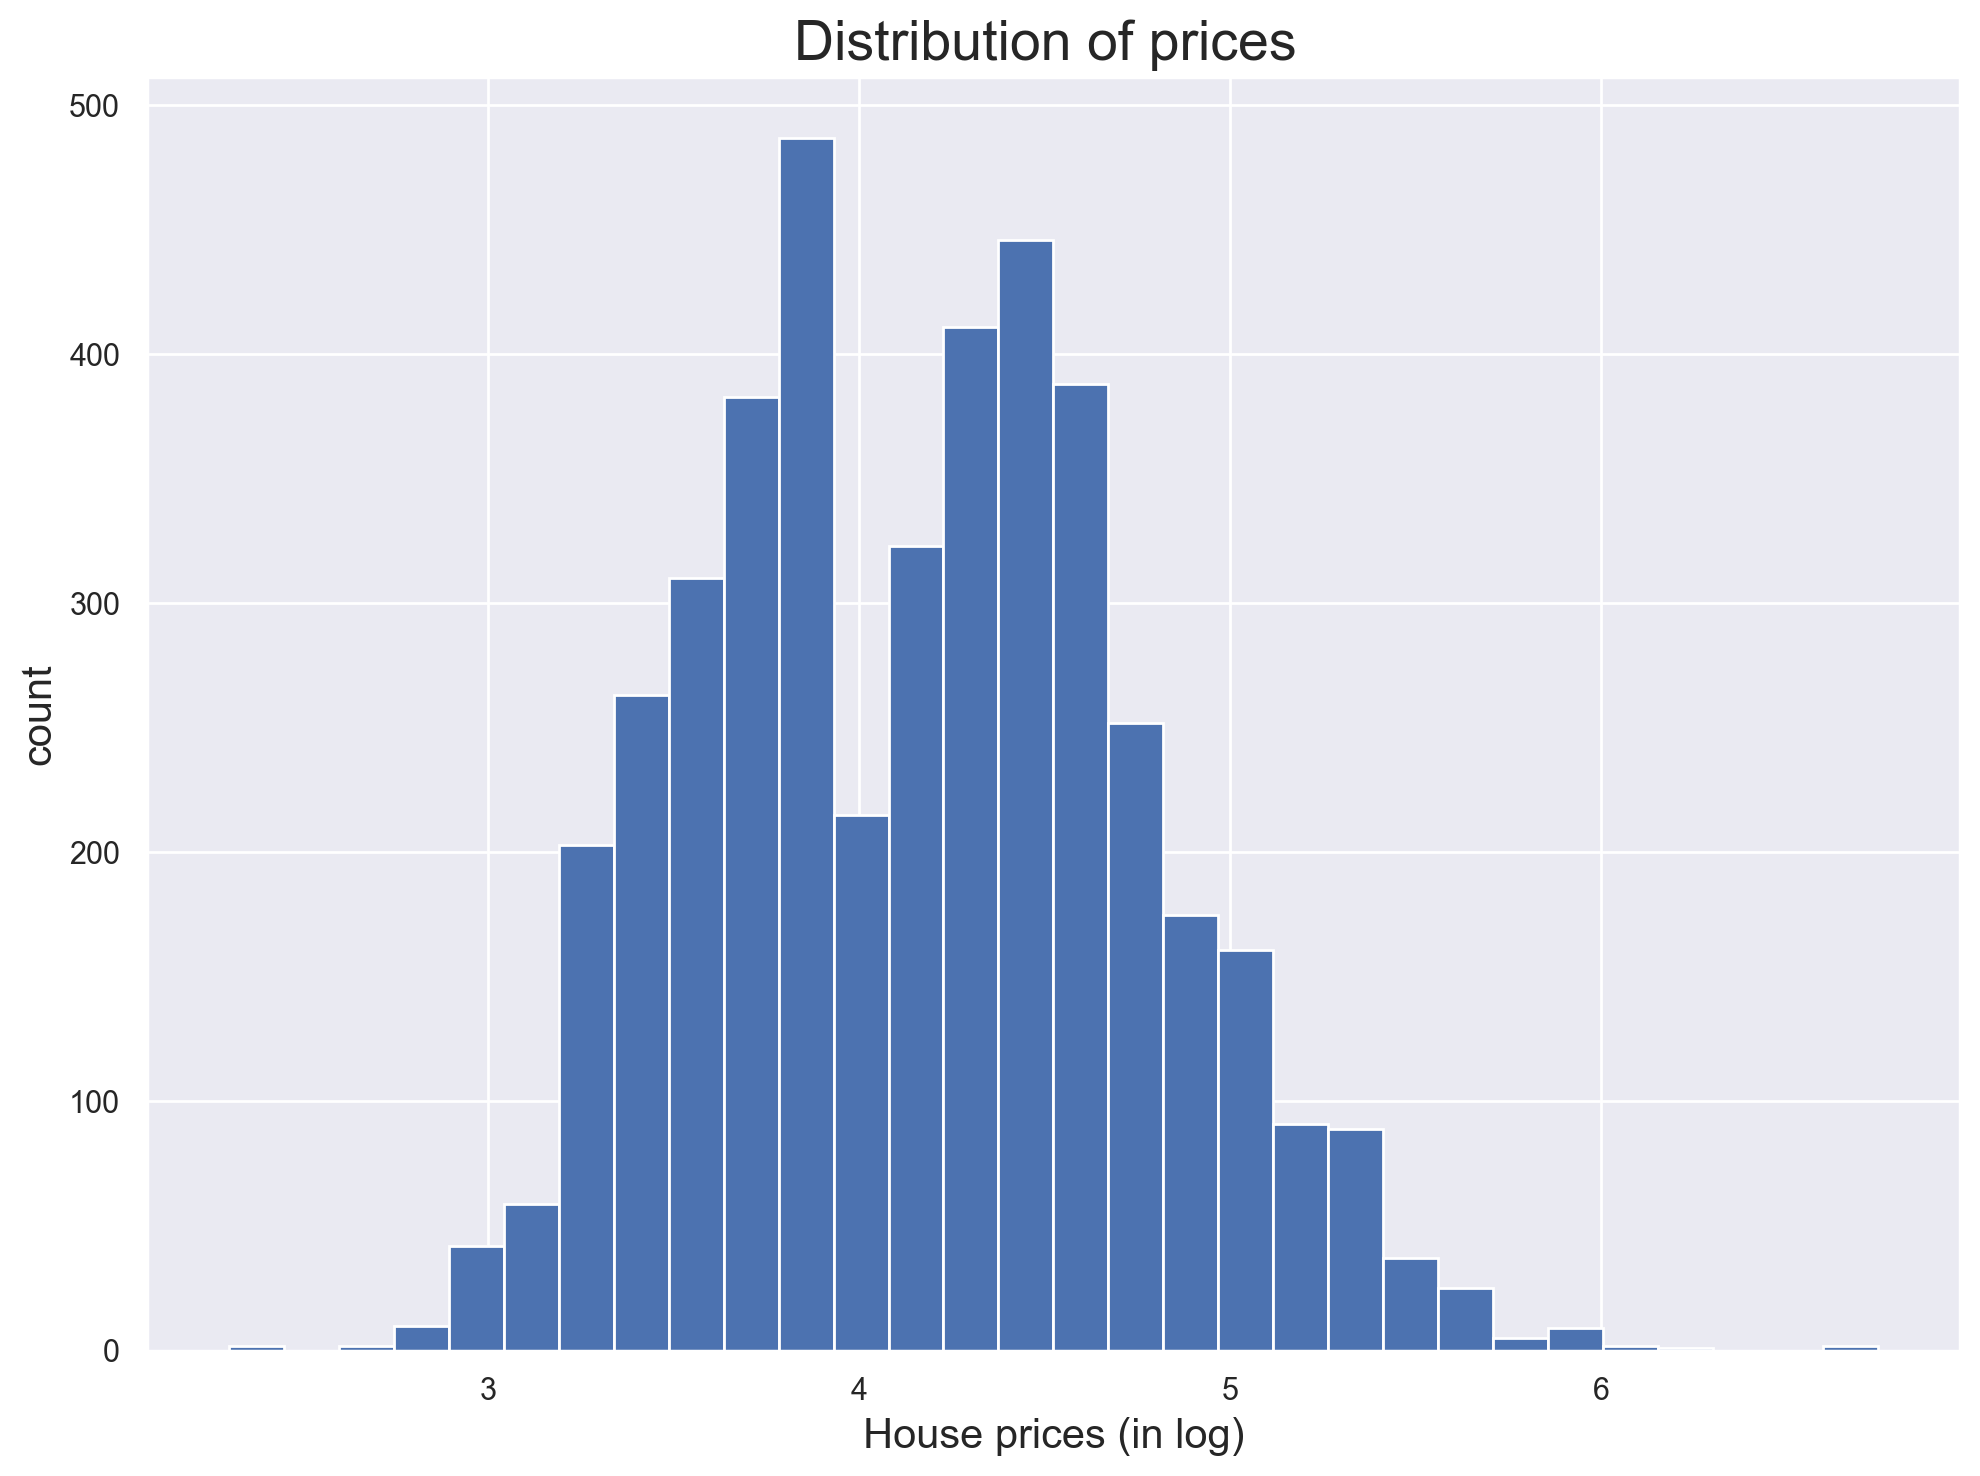

In [8]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(y_full, bins=30)
plt.xlabel("House prices (in log)", size=15)
plt.ylabel('count', size=15)
plt.title('Distribution of prices ', size=20)
plt.show()

### Features ($X$) used for prediction

In [9]:
# All of the available features
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 87 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   f_property_type            4393 non-null   object 
 1   f_room_type                4393 non-null   object 
 2   f_room_type2               4393 non-null   object 
 3   f_cancellation_policy      4393 non-null   object 
 4   f_bed_type                 4393 non-null   object 
 5   f_neighbourhood_cleansed   4393 non-null   object 
 6   n_accommodates             4393 non-null   float64
 7   n_bathrooms                4393 non-null   float64
 8   n_review_scores_rating     4393 non-null   float64
 9   n_number_of_reviews        4393 non-null   float64
 10  n_guests_included          4393 non-null   float64
 11  n_reviews_per_month        4393 non-null   float64
 12  n_extra_people             4393 non-null   float64
 13  n_minimum_nights           4393 non-null   float

In [10]:
# data represented with numbers
filter_col = [col for col in features if (col.startswith('n_'))]
filter_col = [col for col in filter_col if not (col.endswith('2') or col.endswith('3'))]

numerical_data = features[filter_col]
numerical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4393 entries, 0 to 4392
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   n_accommodates          4393 non-null   float64
 1   n_bathrooms             4393 non-null   float64
 2   n_review_scores_rating  4393 non-null   float64
 3   n_number_of_reviews     4393 non-null   float64
 4   n_guests_included       4393 non-null   float64
 5   n_reviews_per_month     4393 non-null   float64
 6   n_extra_people          4393 non-null   float64
 7   n_minimum_nights        4393 non-null   float64
 8   n_beds                  4393 non-null   float64
 9   n_days_since            4393 non-null   float64
dtypes: float64(10)
memory usage: 343.3 KB


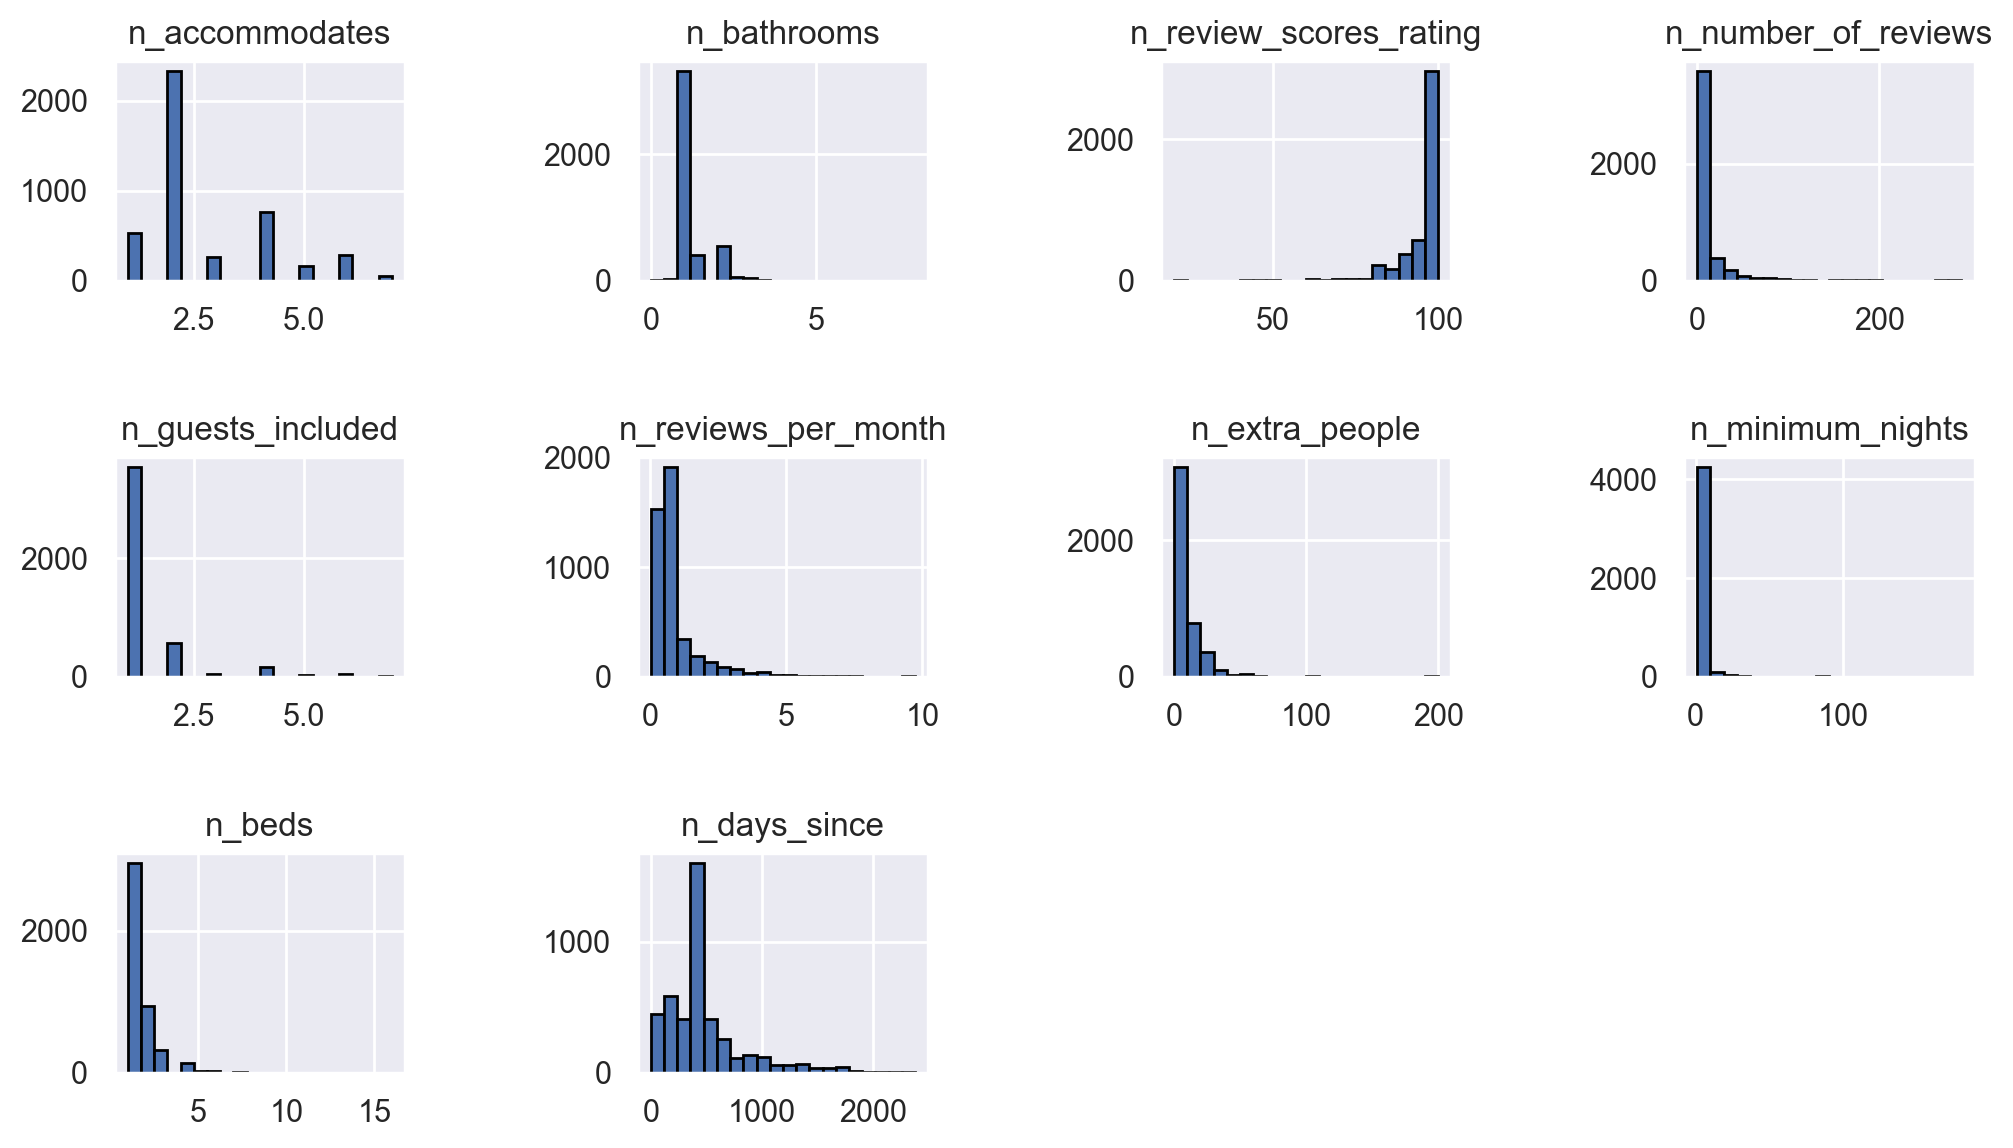

In [11]:
# histogram for all these features
numerical_data.hist(bins=20, figsize=(12, 22), edgecolor="black",
                    layout=(9, 4))
plt.subplots_adjust(hspace=0.8, wspace=0.8)

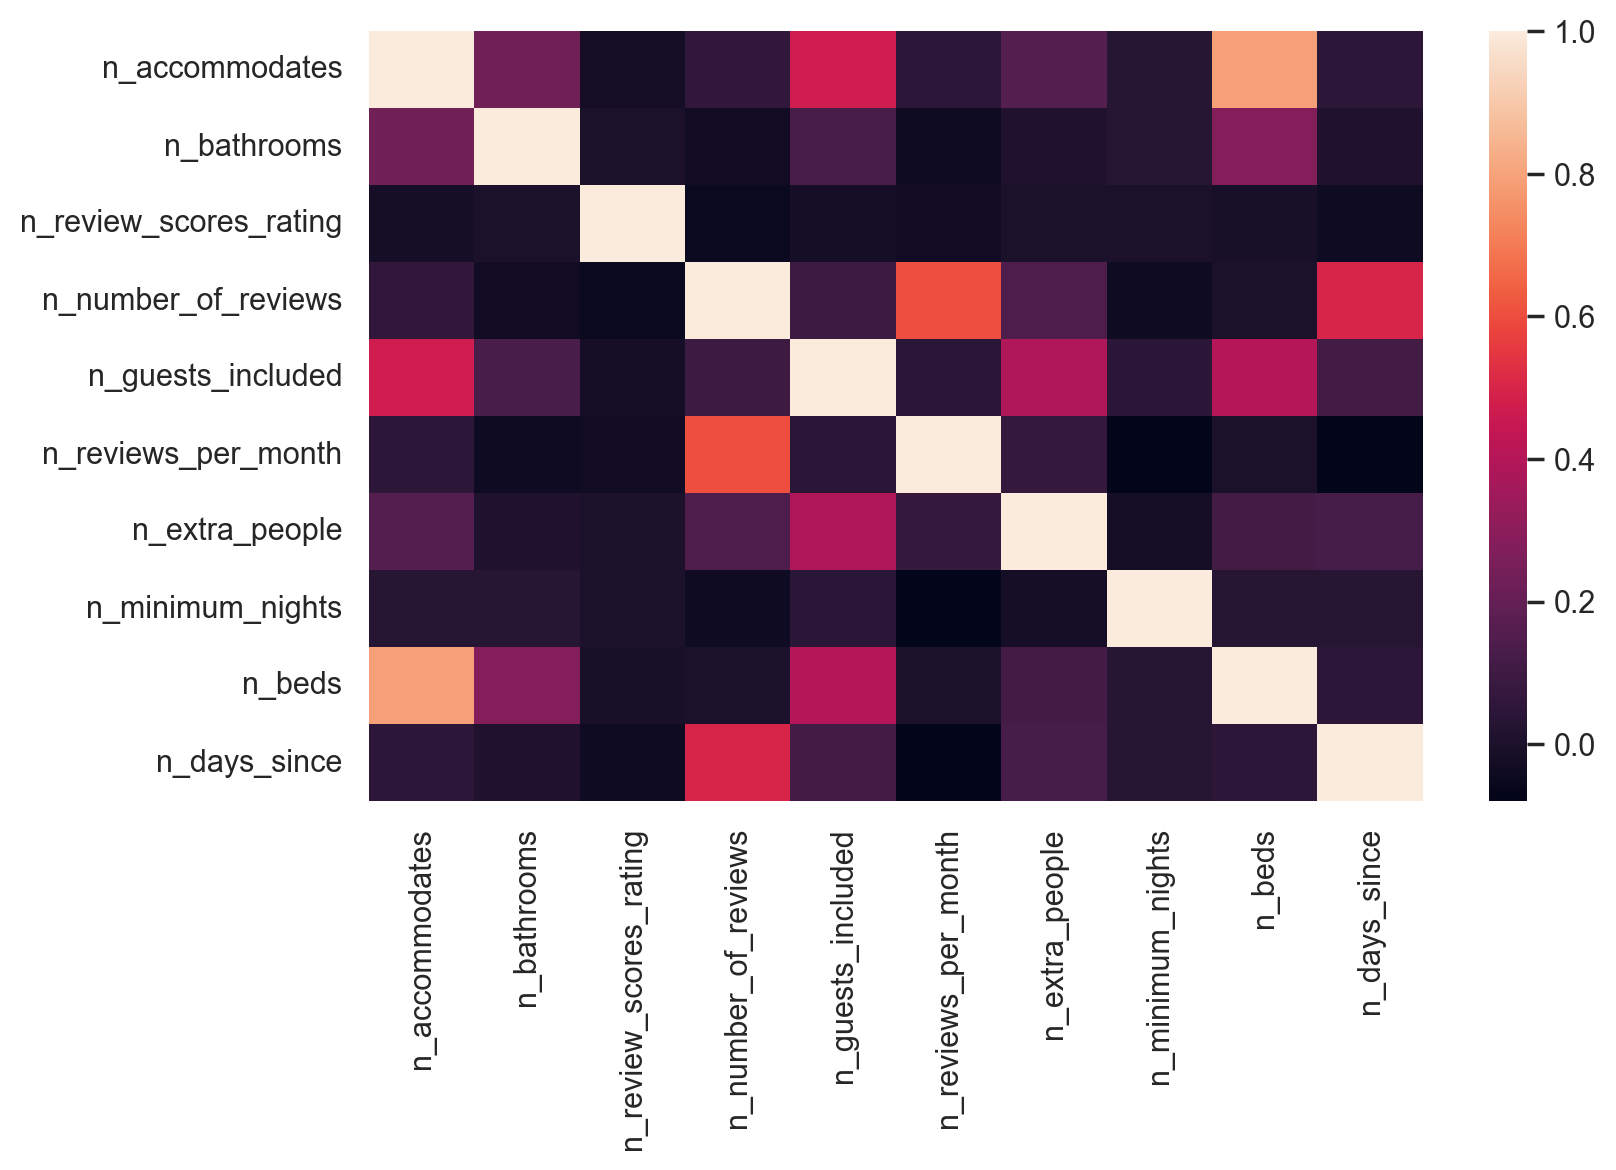

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(8.5,5)})
correlation_matrix = numerical_data.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

## Scikit-Learn Design Overview

### Transformer (preprocessor): An object that transforms a data set.
- e.g. `preprocessing.StandardScaler`
- Transformation is performed by the `transform()` method.

### Estimator: an object that can estimate parameters
- e.g. `linear_models.LinearRegression`
- Estimation performed by `fit()` method
- Exogenous parameters (provided by the researcher) are called `hyperparameters`
- The convenience method `fit_transform()` both fits an estimator and returns the transformed input data set.

### Predictor: An object that forms a prediction from an input data set.
- e.g. `LinearRegression`, after training
- The `predict()` method forms the predictions.
- It also has a `score()` method that measures the quality of the predictions given a test set.

### Miscellaneous
- **Inspection**: Hyperparameters and parameters are accessible. Learned parameters have an underscore suffix (e.g.`lin_reg.coef_`)
- **Non-proliferation of classes**: Use native Python data types; existing building blocks are used as much as possible.
- **Sensible defaults**: Provides reasonable default values for hyperparameters – easy to get a good baseline up and running

## Our first ML model
1. Prepare the data for the ML algorithm
2. Split train & test sets
3. `Fit` on the train set & `predict`
4. Evaluate

## 1. Prepare the data for ML algorithms

In [13]:
cat_col=[col for col in features if col.startswith("f_")]
dum_col=[col for col in features if col.startswith("d_")]
num_col=[col for col in features if col.startswith("n_")]

In [14]:
#X_full=features[cat_col+num_col+dum_col]
X_full=features[num_col]

## 2. Split train test sets 
### Using `train_test_split`
Pure ramdomness of the sampling method

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (3514, 13) (3514,)
test data (879, 13) (879,)


### Feature Scaling
Most common scaling methods: 
- **standardization**= normalization by substracting the mean and dividing by the standard deviation (values are not bounded)
- **Min-max scaling**= normalization by substracting the minimum and dividing by the maximum (values between `0` and `1`)

In [16]:
numeric_columns=list(X_train.select_dtypes('float64').columns)
categorical_columns=list(X_train.select_dtypes('int64').columns)

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat', OneHotEncoder() ,categorical_columns),
])

X_train_scaled=pipeline.fit_transform(X_train)
X_test_scaled=pipeline.fit_transform(X_test)

## 3. Select and Train a Model
**Regression algorithm** (we consider firs the `LinearRegression`, more algorithms will be discussed later):

### First algorithm: Simple Linear Regression 

In [18]:
# our first machine learning model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg

LinearRegression()

<div class="alert alert-block alert-warning">
    <i class="fa fa-warning"></i>&nbsp;<strong><code>scikit-learn</code> API</strong>

In <code>scikit-learn</code> all regression algorithms have:
<ul>
    <li>a <strong><code>fit()</code></strong> method to learn from data, and</li>
    <li>and a subsequent <strong><code>predict()</code></strong> method for predicting numbers from input features.</li>
</ul>
</div>

In [19]:
X_train_num=X_train[numeric_columns]
lin_reg.fit(X_train_num, y_train)

LinearRegression()

In [20]:
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train_num, y_train), 2)))

R-squared for training dataset:0.49


In [21]:
lin_reg.fit(X_train_scaled, y_train)
print("R-squared for training dataset & scaled features:{}".
      format(np.round(lin_reg.score(X_train_scaled, y_train), 2)))

R-squared for training dataset & scaled features:0.49


Note: $R^2 =$ **the proportion of variance (of $y$) that has been explained by the independent variables in the model**. 


### Coefficients of the linear regression

In [22]:
lin_reg.coef_

array([ 0.77556932,  0.00902972,  0.05866333, -0.02235803,  0.04022264,
        0.00354984, -0.01182755, -0.01387958,  0.00819937,  0.09729564,
       -0.41081488, -0.13837871,  0.08480976])

In [23]:
print('The coefficients of the features from the linear model:')
print(dict(zip(num_col+dum_col, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'n_accommodates': 0.78, 'n_bathrooms': 0.01, 'n_review_scores_rating': 0.06, 'n_number_of_reviews': -0.02, 'n_guests_included': 0.04, 'n_reviews_per_month': 0.0, 'n_extra_people': -0.01, 'n_minimum_nights': -0.01, 'n_beds': 0.01, 'n_days_since': 0.1, 'n_accommodates2': -0.41, 'n_days_since2': -0.14, 'n_days_since3': 0.08}


## 4. Metrics / error measures   

`scikit-learn` offers the following metrics for measuring regression quality:


#### Mean squared error (mse)

Here we replace the absolute difference by its squared difference. Squaring also insures positive differeces.


<div class="alert alert-block alert-warning">
    <i class="fa fa-info-circle"></i>&nbsp; <strong>mean squared error</strong> is defined as 



$$
\frac{1}{n} \left(\, (y_1 - \hat{y}_1)^2 \, + \, (y_2 - \hat{y}_2)^2 \, \, \ldots \,+ \,(y_n - \hat{y}_n)^2 \,\right)
$$


</div>



This measure is more sensitive to **outliers**: A few larger differences contribute more significantly to a larger mean squared error. 

`neg_mean_squared_error` in `scikit-learn`.

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_train_pred = lin_reg.predict(X_train_scaled)

### In-sample performance with MSE $=$ in the training set

In [25]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMSE: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2)) 

RMSE: 0.42022920675673536


<div class="alert alert-info">
<h3> Your turn</h3>
    Compute the out-of-sample mean squarred error = **test mse**
</div>

In [26]:
#1. Out-of-sample performance = test RMSE
y_test_pred = lin_reg.predict(X_test_scaled)    
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMS: %s" % test_rmse) 

RMS: 0.41741915032656246


### Binned Regression Plots

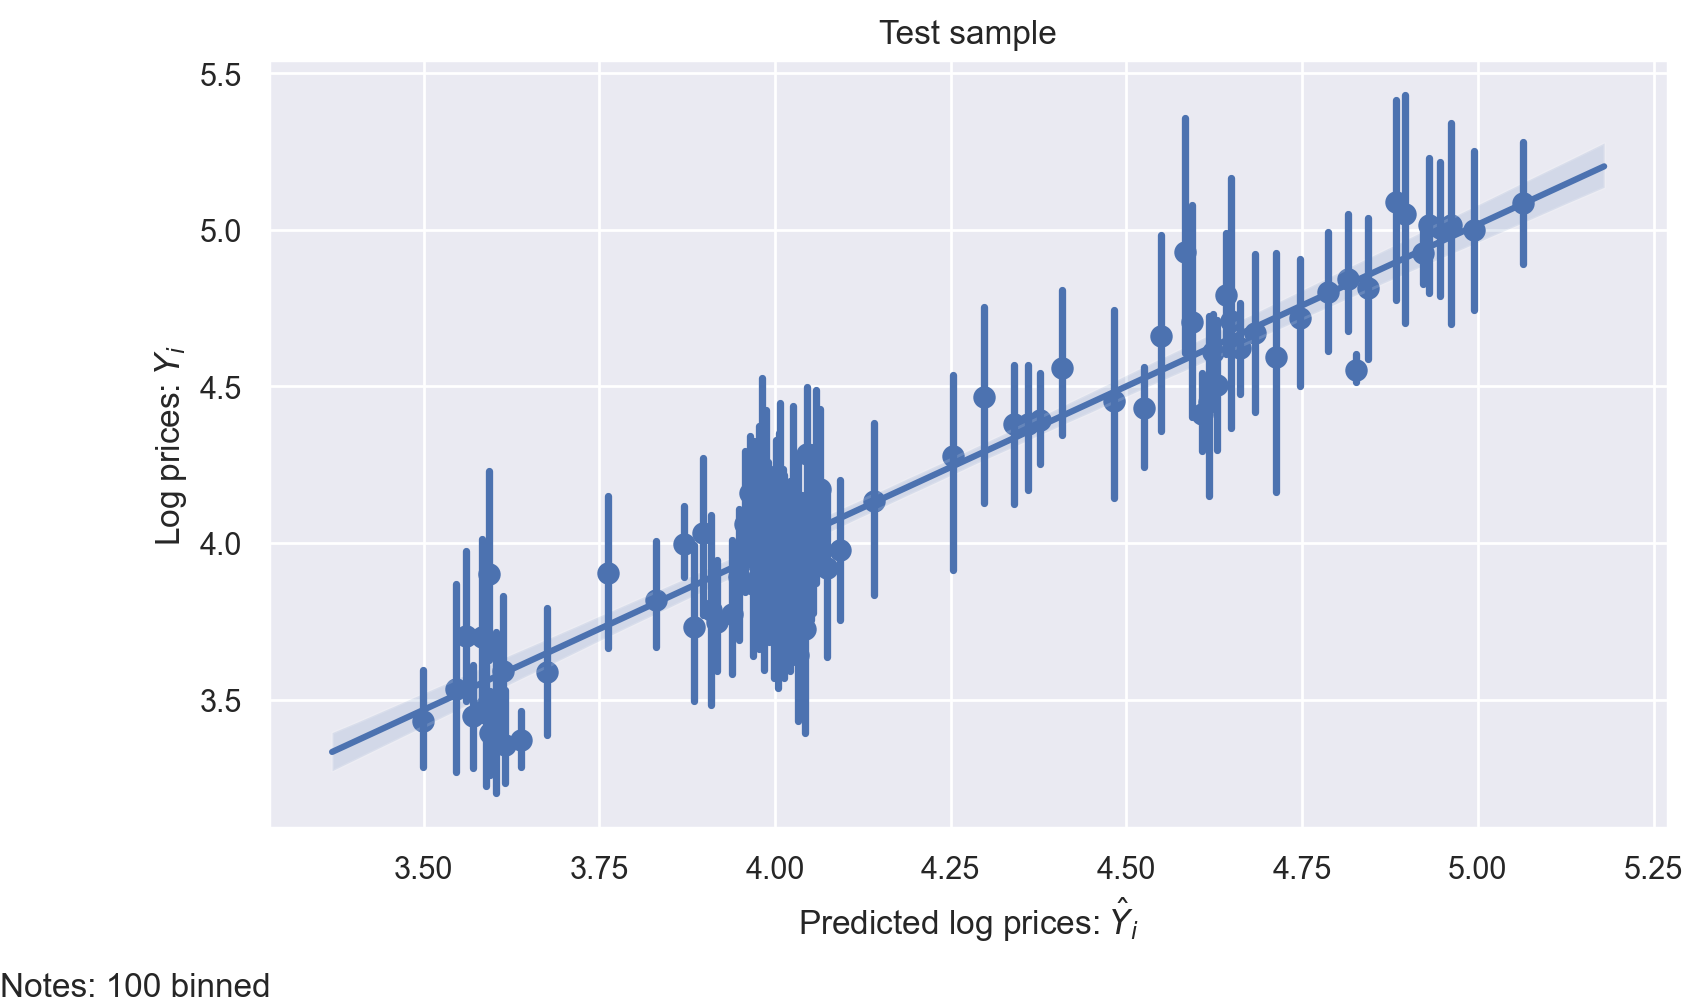

In [27]:
# Regplot
g=sns.regplot(x= y_test_pred, y=y_test, x_bins=100)
g=g.set_title("Test sample")

plt.xlabel("Predicted log prices: $\hat{Y}_i$")
plt.ylabel("Log prices: $Y_i$")
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

### Plotting Regression Residuals

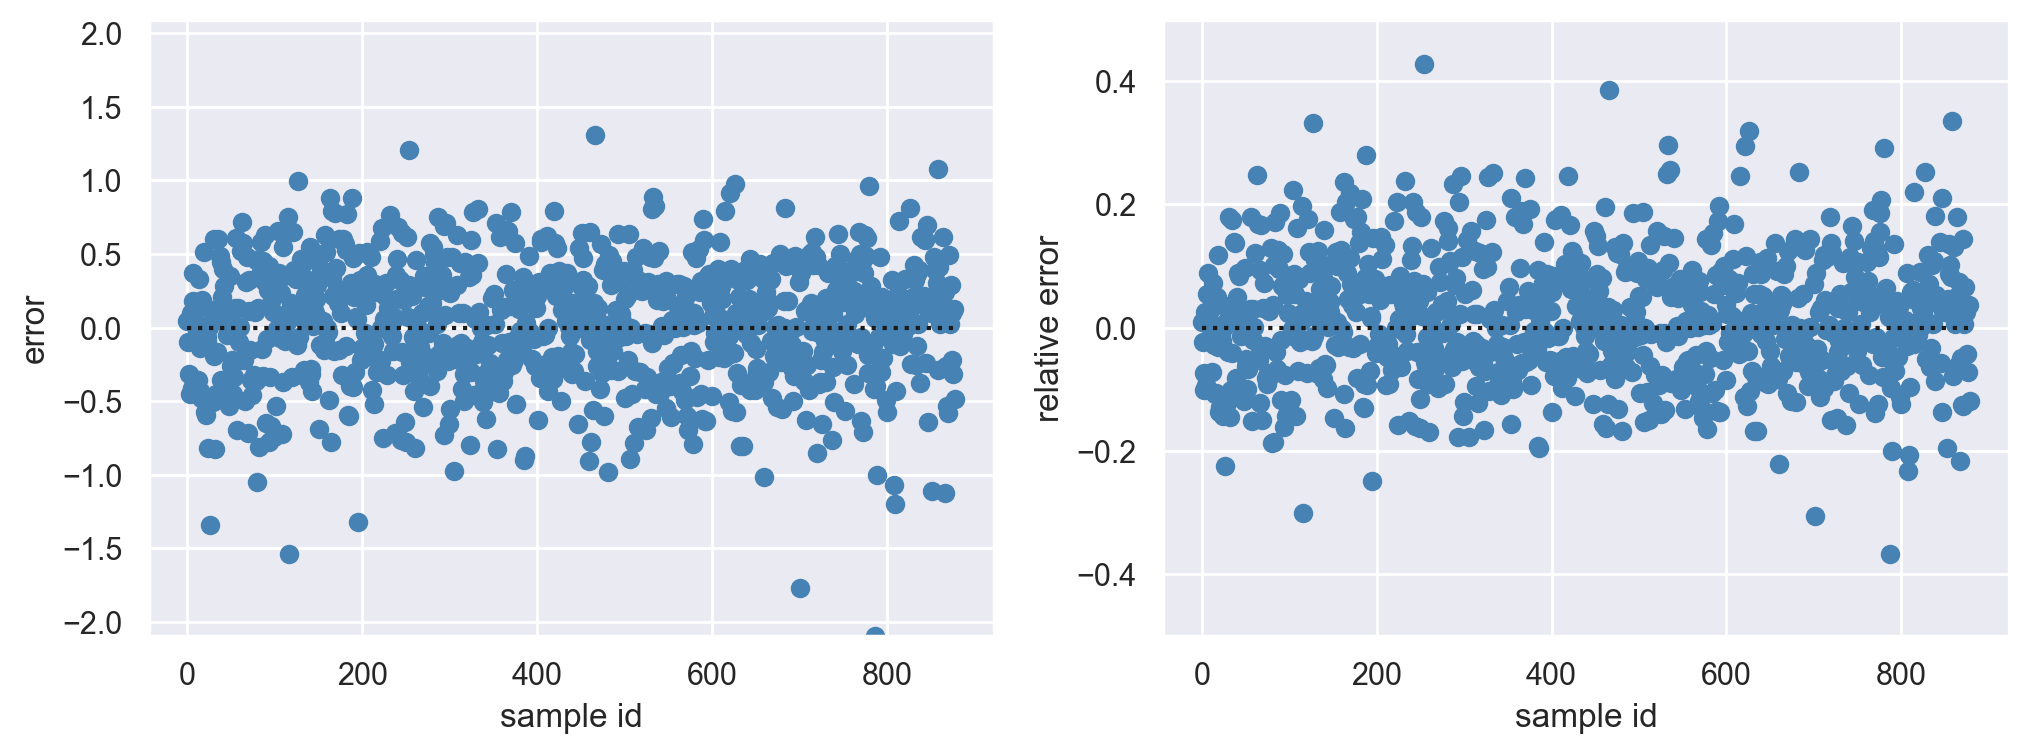

In [28]:
#Let us plot how good given and predicted values match on the training data set (sic !).
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(y_test, y_test_pred)

### Linear Models: pros and cons
- [Pros]():
  - Interpretability
  - Good predictive performance
  - Accuracy measures for
      - coefficient estimates (standard errors and confidence intervals)
      - the model

- [Cons]():
  - When $p>n$
  - Tend to over-fit training data.
  - Cannot handle multicollinearity.

## Extensions of the Linear Regression Model

Going further model's assumptions:

- the **additive**: the effect of changes in a predictor $X_j$ on the response $Y$ is independent of the values of the other predictors

-  **linearity**: the change in the response $Y$ due to a one-unit change in $X_j$ is constant


#### Interactions
- Adding interacted variable can help
- Should respect the <bcolor>hierarchy principle</bcolor>:
  - if an interaction is included, the model should always include the main effects as well

Notes:
- Even if the p-value associated with their coef is not significant
- Interactions are hard to interpret without main effects in the model

#### Non Linearity
- Include transformed versions of the predictors in the model


$\Rightarrow$ Including polynomials in $X$ may provide a better fit

### Polynomial regression
#### Polynomial features

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_features=PolynomialFeatures(degree=2)

X_train_poly=poly_features.fit_transform(X_train)

In [30]:
X_train_poly.shape

(3514, 105)

<div class="alert alert-info">
<h4> Your turn</h4>
    Build the polynomials features for the test set
</div>

In [31]:
X_test_poly=poly_features.fit_transform(X_test)

<div class="alert alert-info">
<h4> Your turn</h4>
    Fit a linear regression using the polynomial features
</div>

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

LinearRegression()

<div class="alert alert-info">
<h4> Your turn</h4>
    Predict the outcome using the estimated model
</div>

In [33]:
y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)

train_mse = mean_squared_error(y_train,y_train_pred)
print("test RMS: %s" % np.sqrt(train_mse)) 

test RMS: 0.5112700805766044


<div class="alert alert-info">
<h4> Your turn</h4>
    Compute the test MSE on the train & test sample
</div>

In [34]:
test_rmse = mean_squared_error(y_test,y_test_pred)
test_rmse = np.sqrt(test_rmse)
print("test RMS: %s" % test_rmse) 
#print("train R2: %s" % round(r2_score(y_train, y_train_pred), 2)) 
#print("test R2: %s" % round(r2_score(y_test, y_test_pred), 2))

test RMS: 0.5864843890772982


## Regularized Regressions
<html><div style='float:left'></div><hr color='#EB811B' size=1px width=796px></html>

#### Why Regularization?

- Solution against **over-fitting**

-  Allow High-Dimensional Predictors
  - $p>>n$: OLS no longer has a unique solution
  - $x_i$ "high-dimensional" i.e. very many regressors
    - pixels on a picture

Corollary of regularization:
- Prediction Accuracy: especially when $p > n$, to control the variance

- **Ridge**: shrinks coefficients toward zero and helps select between collinear predictors.
- **Lasso** automatically performs feature selection and outputs a sparse model.

Also: 
- **Subset selection**: $p(\beta_j)=1\\{\beta_j\neq 0\\}$

## Lasso Regression

$$min_{\beta} \sum_{i=1}^n (y_i - \hat y_i)^2 + \lambda \sum_{j=1}^p |\beta_j| $$

- $\lambda > 0$ = penalty parameter
- covariates can be high-dimensionnal $p>>N$

Trade-off, from the minimization of the sum of
1. **RSS**
2. **Shrinkage penalty**: decreases with $\beta_j$

$\rightarrow$ relative importance given by $\lambda$

RSS= Residual sum of squares

- The tuning parameter $\lambda$ serves to control the relative impact of these two terms on the regression coefficient estimates.
- When $\lambda=0$, the penalty term has no effect, and ridge regression will produce the least squares estimates
- when $\lambda \rightarrow \infty$ : penalty grows and coefficient estimates approach zero

In [35]:
X_full=features[cat_col+num_col+dum_col]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full,test_size=0.2, random_state=1)
print("train data", X_train.shape, y_train.shape)
print("test data", X_test.shape,  y_test.shape)

train data (3514, 72) (3514,)
test data (879, 72) (879,)


In [36]:
numeric_columns=list(X_train.select_dtypes('float64').columns)
categorical_columns=list(X_train.select_dtypes('int64').columns)

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder


pipeline=ColumnTransformer([
    ('num',StandardScaler(),numeric_columns),
    ('cat', OneHotEncoder() ,categorical_columns),
])

X_train_scaled=pipeline.fit_transform(X_train)
X_test_scaled=pipeline.fit_transform(X_test)

In [37]:
from sklearn.linear_model import Lasso

In [38]:
lasso_reg=Lasso(alpha=.01) # set up       
lasso_reg.fit(X_train_scaled, y_train)

y_train_pred = lasso_reg.predict(X_train_scaled)
y_test_pred = lasso_reg.predict(X_test_scaled)

test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print("test RMS: %s" % test_rmse) 

test RMS: 0.41494202181447276


In [39]:
print('The coefficients of the features from the Lasso model:')
print(dict(zip(features, [round(x,2) for x in lasso_reg.coef_])))

The coefficients of the features from the Lasso model:
{'f_property_type': 0.01, 'f_room_type': -0.02, 'f_room_type2': 0.02, 'f_cancellation_policy': 0.35, 'f_bed_type': -0.0, 'f_neighbourhood_cleansed': 0.04, 'n_accommodates': 0.0, 'n_bathrooms': 0.02, 'n_review_scores_rating': -0.0, 'n_number_of_reviews': 0.0, 'n_guests_included': -0.01, 'n_reviews_per_month': -0.0, 'n_extra_people': 0.01, 'n_minimum_nights': -0.0, 'n_beds': 0.0, 'n_days_since': 0.0, 'd_24hourcheckin': 0.0, 'd_airconditioning': -0.0, 'd_breakfast': -0.0, 'd_buzzerwirelessintercom': 0.0, 'd_cabletv': -0.0, 'd_carbonmonoxidedetector': 0.0, 'd_cats': -0.03, 'd_dogs': 0.0, 'd_doorman': -0.0, 'd_doormanentry': 0.0, 'd_dryer': -0.0, 'd_elevatorinbuilding': 0.0, 'd_essentials': 0.0, 'd_familykidfriendly': -0.0, 'd_fireextinguisher': 0.0, 'd_firstaidkit': -0.0, 'd_freeparkingonpremises': -0.0, 'd_freeparkingonstreet': 0.0, 'd_gym': 0.0, 'd_hairdryer': -0.0, 'd_hangers': -0.03, 'd_heating': 0.0, 'd_hottub': -0.03, 'd_indoorfi

## Setting the **regularization parameter**: generalized Cross-Validation.

In [40]:
alphas=np.logspace(-6, 6, 13) 
alphas

array([1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01,
       1.e+02, 1.e+03, 1.e+04, 1.e+05, 1.e+06])

In [41]:
from sklearn.linear_model import LassoCV

lassocv_reg = LassoCV(alphas=alphas)
lassocv_reg.fit(X_train_scaled, y_train)
alpha=lassocv_reg.alpha_ 
print("Best alpha", alpha)

/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.198798979276944, tolerance: 0.10070714194681506
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27078196771566354, tolerance: 0.10070714194681506
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.16381881592872105, tolerance: 0.09729914274511504
  model = cd_fast.enet_coordinate_descent_gram(
/opt/homebrew/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.

Best alpha 0.0001


### Then re-run the model using the best $\alpha$ (on the full dataset)

In [42]:
X_full_scaled=pipeline.fit_transform(X_full)

lasso_reg=Lasso(alpha=alpha)

lasso_reg.fit(X_full_scaled, y_full)

y_pred=lasso_reg.predict(X_full_scaled)
mse = mean_squared_error(y_full, y_pred)
rmse = np.sqrt(mse)
print("test RMS: %s" % rmse)

test RMS: 0.3913822205707415


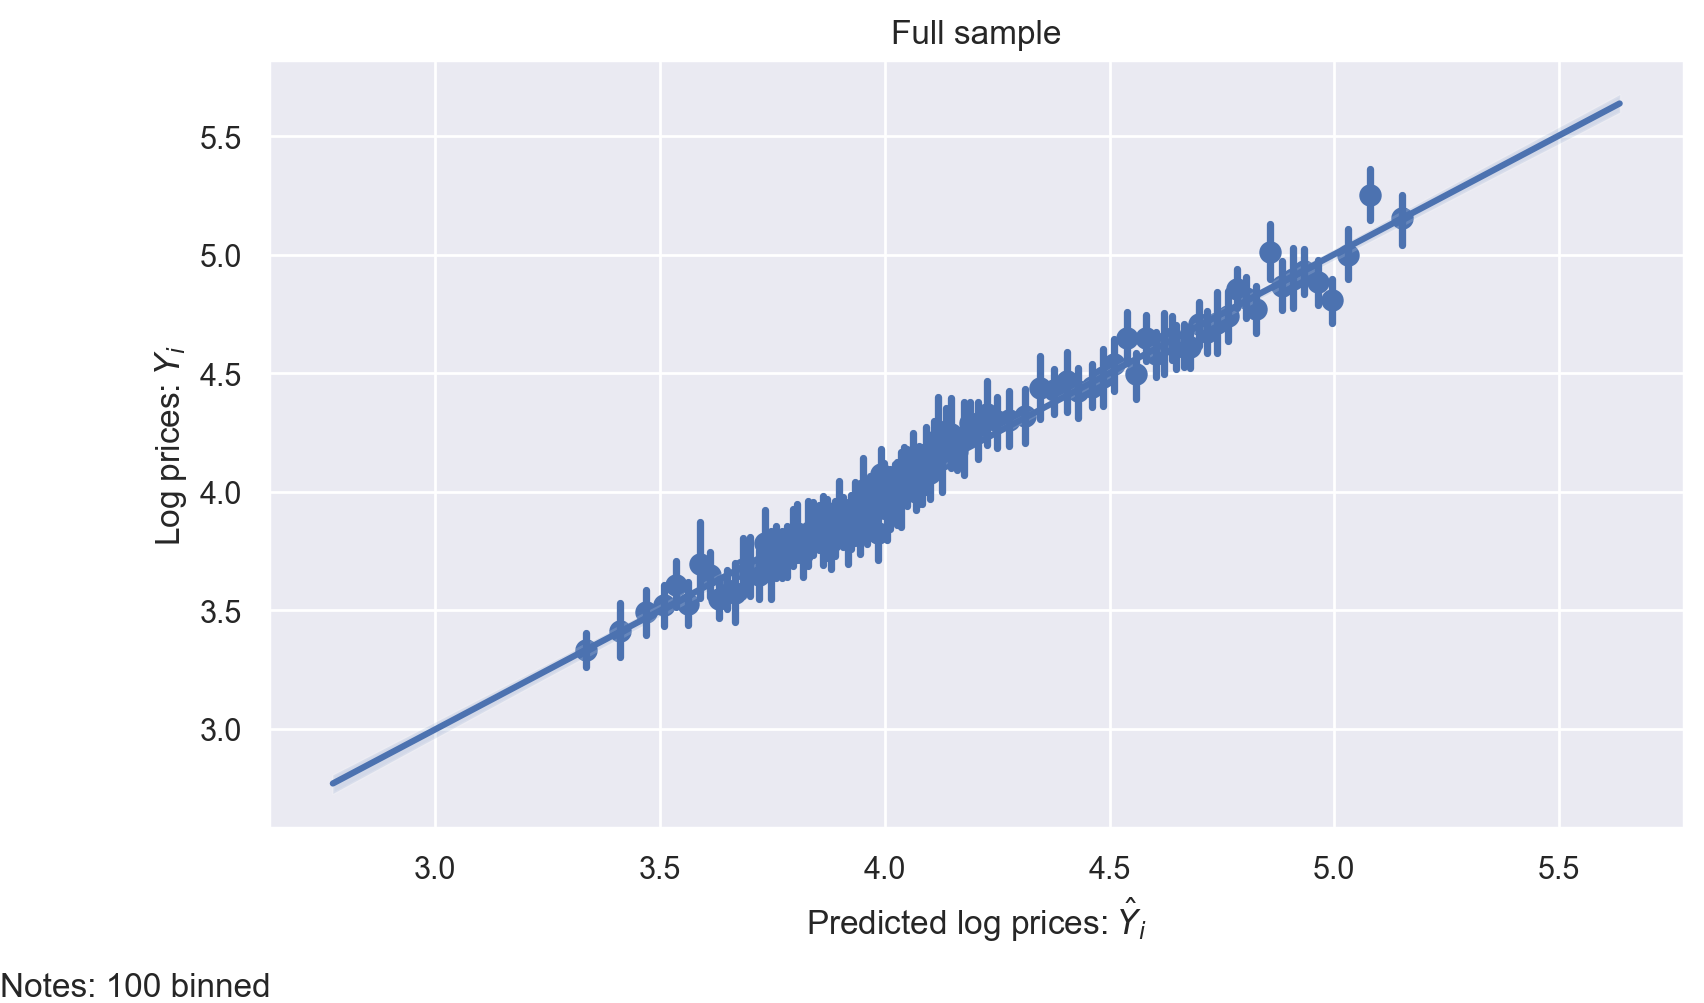

In [43]:
# Regplot
g=sns.regplot(x= y_pred, y=y_full, x_bins=100)
g=g.set_title("Full sample")

plt.xlabel("Predicted log prices: $\hat{Y}_i$")
plt.ylabel("Log prices: $Y_i$")
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

## General ML Procedure

0. Look at the data
1. Select a ML method (eg. LASSO)
2. Draw randomly a hold-out sample from the data
3. Estimate the ML model using different hyperparameters
4. Select the optimal hyperparameters
5. Predict $\hat Y$ using hyperparameters and extrapolated the fitted values to the retarded hold-out-sample
6. Evaluation the prediction power of the ML in the hold-out-sample

## What is not covered in this notebook:
- more advanced regression algorithms (gradient boosting, random forest)
- classification algorithm
- pipelines